## Missing Values & Data Cleaning

In [325]:
import numpy as np                                                  # importing required python libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder


In [326]:
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\homeLoanTrainData.csv')            # importing dataset for analysis
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [328]:
# dropping unnecessary cols
data = data.drop('Loan_ID',axis=1)

In [329]:
# analysing the missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

above output shows the total null values in each column.<br>
Let's calculate the percentage of nulls in each column so as to understand how exactly to handle the missing values efficiently

In [330]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)                                          # sorting the cols in decreasing order of total null values
    percent_missing_df = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])      # Number and percentage of missing data in training data set for each column
    return missing_data_df

In [331]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]                                                                             # displaying only cols with missing values

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


## Handling Categorical cols

In [332]:
# checking distinct vals of col     
data.Self_Employed.unique()                                                                 

array(['No', 'Yes', nan], dtype=object)

In [333]:
# imputing SE col's null vals with 'other' as removing them will cause significant data loss 
data['Self_Employed'] = data['Self_Employed'].fillna('Other')                               # Self_Employed = 'Other' for nan

In [334]:
# Highest Freq imputation for some categorical columns.
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

## Handling Numerical cols

In [335]:
# imputing CH col with 2 as removing them will cause significant data loss 

data['Credit_History'] = data['Credit_History'].fillna(2)                                   # Credit History=2 for nan/missing values.

In [336]:
# median imputation for numerical columns.

num_missing = ['LoanAmount',  'Loan_Amount_Term']

median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [337]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent


blank table above confirms no cols have missing vals

## Categorical to Numerical encoding

For checking correlation between all cols, all object datatypes need to be converted to numerical

In [338]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### # Dependents

In [339]:
data['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [340]:
data['Dependents']=data['Dependents'].replace('3+',3).astype('float')                                  # capping dependents greater than 3

### # Loan_Status

In [341]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

since Loan Status col has only 2 categories, either of Label or One-Hot encoding can be used

In [342]:
label_encoder = LabelEncoder()
col='Loan_Status'
data[col] = label_encoder.fit_transform(data[col])

In [343]:
data[col].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

Y and N categories of LoanStatus is changed to numeric (1 / 0)

### # Gender

In [344]:
data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [345]:
label_encoder = LabelEncoder()
col='Gender'
data[col] = label_encoder.fit_transform(data[col])

In [346]:
data[col].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

### # Married

In [347]:
data['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [348]:
label_encoder = LabelEncoder()
col='Married'
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

### # Property Area

In [349]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

since Property_Area col has only 2+ categories, Label encoding will introduce an unnecessary bias. Hence One-Hot / Target(Response) encoding is preferred

In [350]:
te = TargetEncoder()
data['Property_Area'] = te.fit_transform(data['Property_Area'], data['Property_Area'])

In [351]:
data['Property_Area'].value_counts()

Property_Area
1.000000e+00    233
2.000000e+00    202
1.290294e-07    179
Name: count, dtype: int64

### # Education

In [352]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

since Education col has only 2 categories, either of Label / Hence One-Hot / Target(Response) encoding can be opted

In [353]:
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Education'].value_counts()

Education
0    480
1    134
Name: count, dtype: int64

### # Self Employed

In [354]:
data['Self_Employed'].value_counts()

Self_Employed
No       500
Yes       82
Other     32
Name: count, dtype: int64

In [355]:
te = TargetEncoder()
data['Self_Employed'] = te.fit_transform(data['Self_Employed'], data['Self_Employed'])
data['Self_Employed'].value_counts()

Self_Employed
0.000000    500
1.996596     82
0.842416     32
Name: count, dtype: int64

In [356]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

[]

none of the existing cols have 'object' datatype, as seen below

In [357]:
data.dtypes

Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

## Correlation Coefficients

<Axes: >

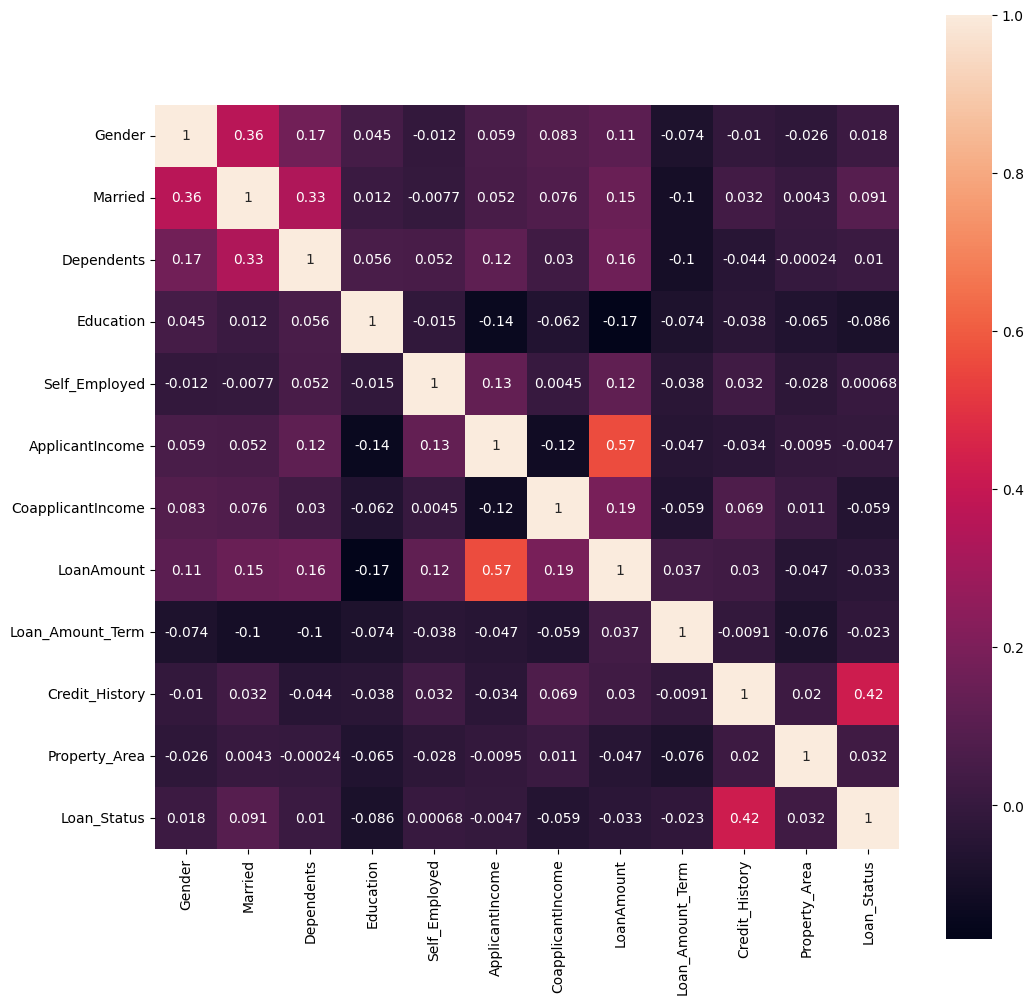

In [358]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True)                                            # Pearson Correlation Coefficients

<Axes: >

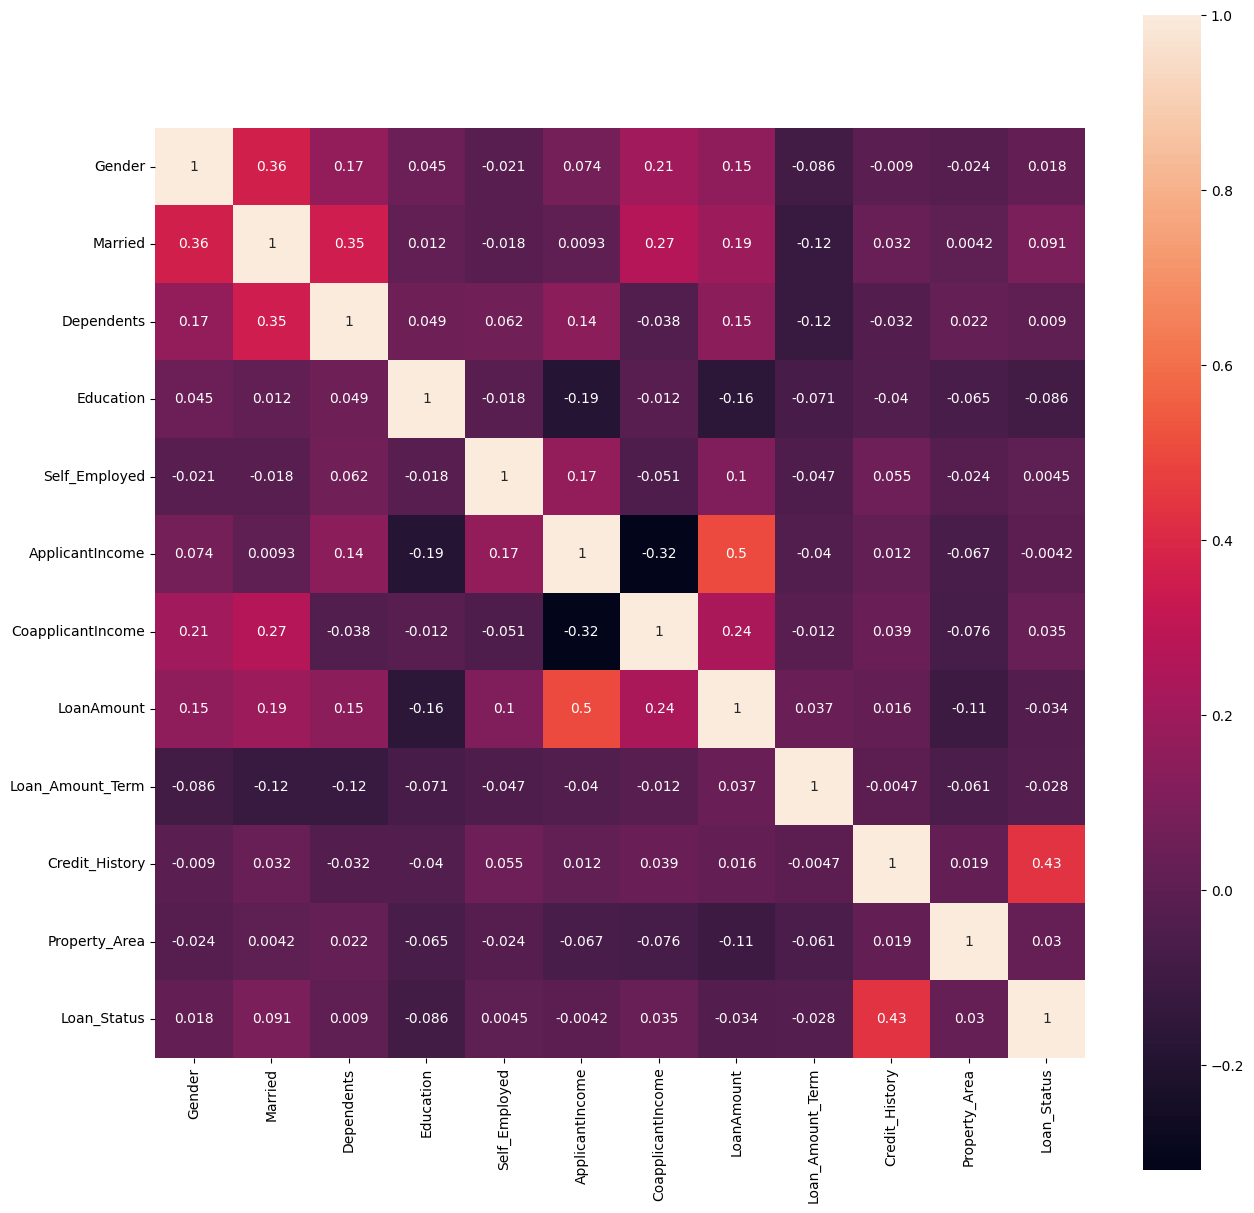

In [359]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(method='spearman'), square=True,annot=True)                               # Spearman Correlation Coefficients

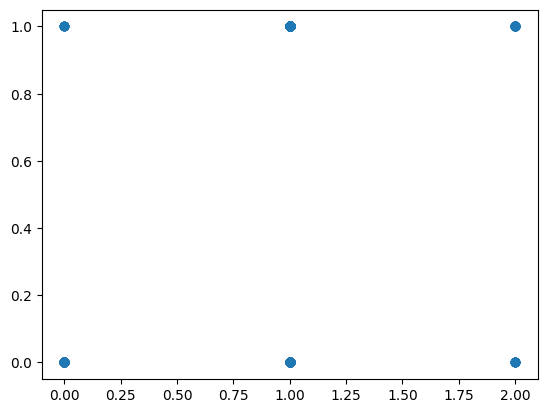

In [360]:
plt.scatter(data['Credit_History'], data['Loan_Status'])
plt.show()

sometimes scatter plots can be misleading do to catgeorical nature of the data

<Axes: xlabel='Credit_History', ylabel='count'>

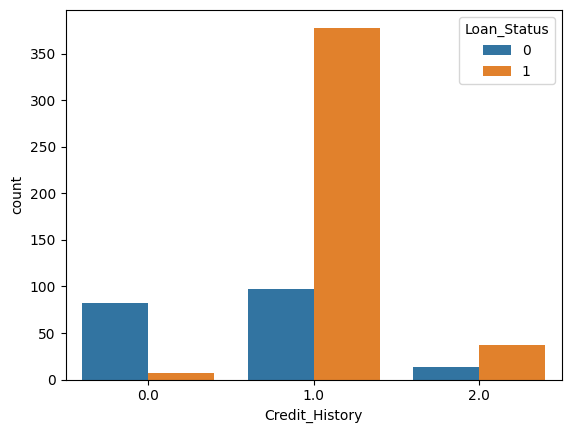

In [361]:
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')

Observation : Approval of loan significantly decreased if no Credit_History records<br>
Loan approval increases with a better Credit_History score and decreases with lower (but existing) Credit_History score

## Column Standarization and Normalization

In [362]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)
std_data = pd.DataFrame(std_data, columns=data.columns)
std_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.451580,0.072991,-0.554487,-0.211241,0.273231,0.134703,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.451580,-0.134412,-0.038732,-0.211241,0.273231,0.134703,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,2.451722,-0.393747,-0.554487,-0.948996,0.273231,0.134703,1.223298,0.674519
3,0.472343,0.728816,-0.737806,1.892641,-0.451580,-0.462062,0.251980,-0.306435,0.273231,0.134703,1.223298,0.674519
4,0.472343,-1.372089,-0.737806,-0.528362,-0.451580,0.097728,-0.554487,-0.056551,0.273231,0.134703,1.223298,0.674519
